<a href="https://colab.research.google.com/github/Jason131sx/CSC324/blob/main/exam_result.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction
To vertify what factor would affects the student's performance, we classify the score into couple of ranks, and try to figure out which would affects student the most. The independent variables are the following:


1.Gender: the sex of students

2.race/ethnicity: ethnicity of students

3.parental level of education: parent's final education

4.lunch: having lunch before test, normal, or abnormal

5.test preparation course: complete or not complete before test

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [2]:
filename = "exam_results.csv"
score_df = pd.read_csv(filename)
score_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
score_df.rename(columns={"race/ethnicity":"ethnicity","parental level of education":"parent_education"
          ,"math score":"math","reading score":"reading","writing score":"writing",
          "test preparation course":"pre"},inplace=True)
score_df.head()

,gender,ethnicity,parent_education,lunch,pre,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
score_df.dtypes

gender              object
ethnicity           object
parent_education    object
lunch               object
pre                 object
math                 int64
reading              int64
writing              int64
dtype: object

In [9]:
math_score = score_df.groupby('gender')['math'].mean()
math_score

gender
female    63.633205
male      68.728216
Name: math, dtype: float64

In [10]:
reading_score = score_df.groupby('gender')['reading'].mean()
reading_score

gender
female    72.608108
male      65.473029
Name: reading, dtype: float64

In [11]:
writing_score = score_df.groupby('gender')['writing'].mean()
writing_score

gender
female    72.467181
male      63.311203
Name: writing, dtype: float64

**Plotting the average score per gender. Use a matplotlit Barplot**

**Plot the average score per category of "Lunch" and "Pre". Use a seaborn boxplot chart**

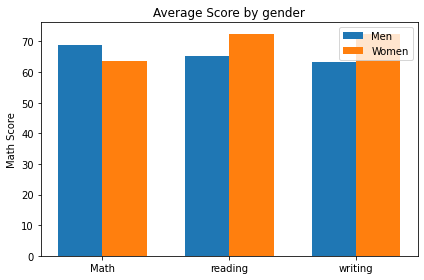

In [12]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['Math', 'reading', 'writing']
men_means = [68.7, 65.4, 63.3]
women_means = [63.6, 72.6, 72.4]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Math Score')
ax.set_title('Average Score by gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

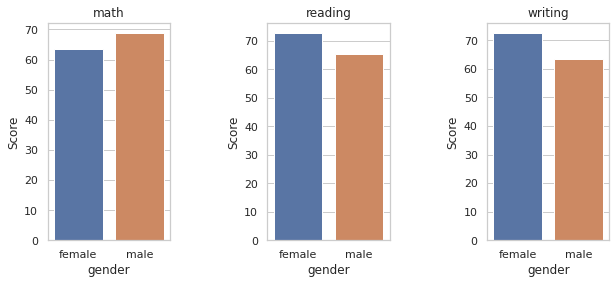

In [25]:
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)
for idx in range(3):
  plt.subplot(1,3, idx+1)
  gender_df = score_df.groupby("gender")[list(score_df.columns[-3:])[idx]].mean()
  sns.barplot(x=gender_df.index, y=gender_df.values)
  plt.ylabel("Score")
  plt.title(list(score_df.columns[-3:])[idx])

plt.show()

In [13]:
lunch_math = score_df.groupby('lunch')['math'].mean()
lunch_math

lunch
free/reduced    58.921127
standard        70.034109
Name: math, dtype: float64

In [15]:
lunch_reading = score_df.groupby('lunch')['reading'].mean()
lunch_reading

lunch
free/reduced    64.653521
standard        71.654264
Name: reading, dtype: float64

In [16]:
lunch_writing = score_df.groupby('lunch')['writing'].mean()
lunch_writing

lunch
free/reduced    63.022535
standard        70.823256
Name: writing, dtype: float64

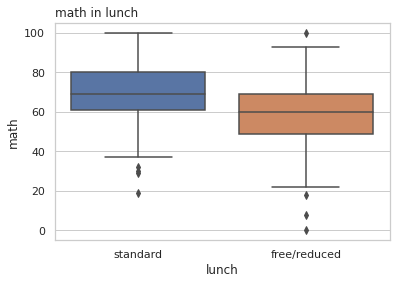

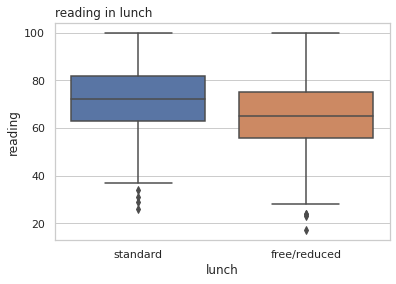

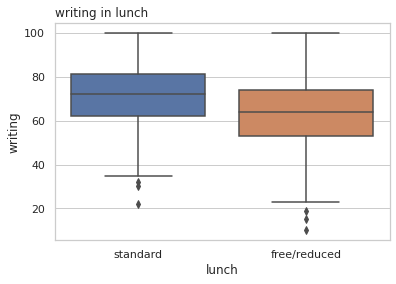

In [23]:
for item in score_df.columns[-3:]:
  sns.boxplot(x=score_df["lunch"], y=score_df[item])
  plt.title(item+" in lunch", loc="left")
  plt.show()

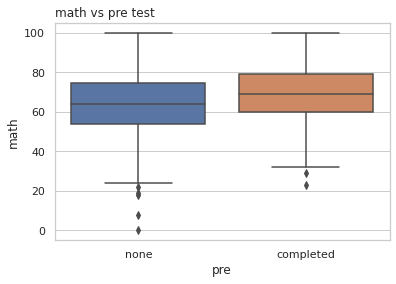

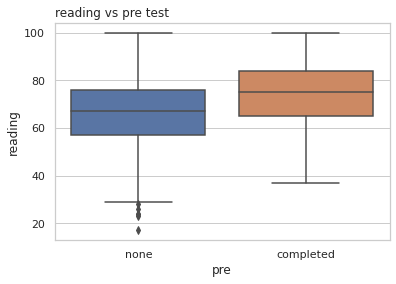

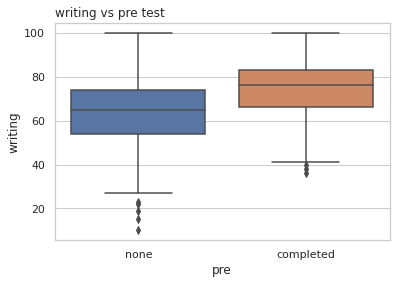

In [21]:
for item in score_df.columns[-3:]:
  sns.boxplot(x=score_df["pre"], y=score_df[item])
  plt.title(item+" vs pre test", loc="left")
  plt.show()